# Decision Tree / Random Forest Project 

In this project I look at publicly available data from [LendingClub.com](www.lendingclub.com). I have attempted to build a model to predict which investments are most likely to pay out for a lender.

The data is available [here](https://www.lendingclub.com/info/download-data.action). I have also included a CSV to avoid having to go through the sign-up process.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria.
* purpose: Why is the loan being taken out?
* int.rate: The interest rate of the loan. lendingclub gives a higher interest rate to riskier investments.
* installment: The monthly loan payments.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower.
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


The Mean for both `credit.policy` and `not.fully.paid` are both unevenly distributed here. This suggests early on that a Random Forest Method may work better for this data.

# Exploration

Text(0.5, 0, 'FICO')

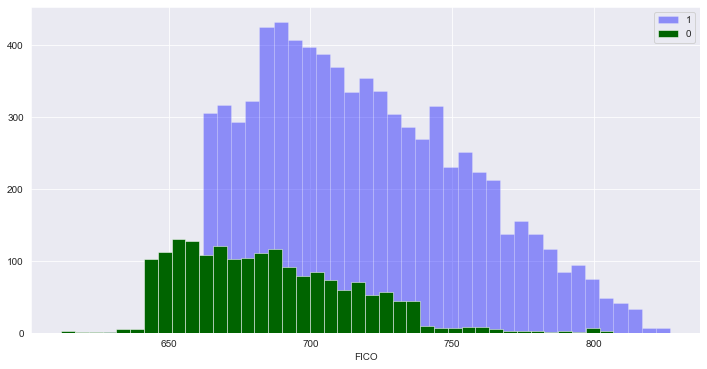

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

bool_arg = loans['credit.policy'] == 1

sns.distplot(
    loans[bool_arg]['fico'], 
    kde=False,
    bins=40,
    hist_kws={'color': 'blue', 'linewidth': 0.5}
)
sns.distplot(
    loans[~bool_arg]['fico'],
    kde=False,
    bins=40,
    hist_kws={'color': 'darkgreen', 'alpha': 1, 'linewidth': 0.5}
)
plt.legend(labels=(1, 0))
ax.set_xlabel('FICO')

Text(0.5, 0, 'Not Fully Paid')

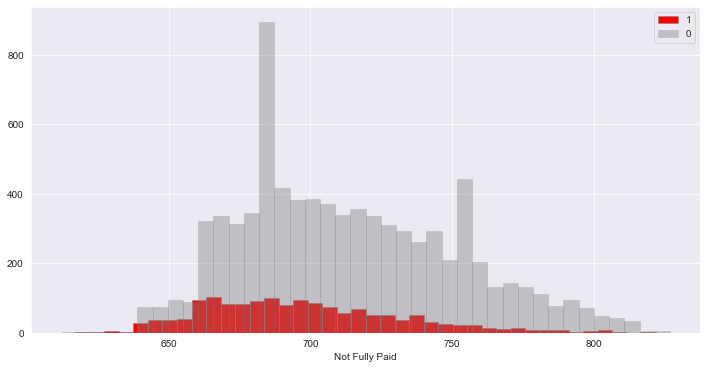

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

bool_arg = loans['not.fully.paid'] == 1

sns.distplot(
    loans[bool_arg]['fico'], 
    kde=False,
    bins=40,
    hist_kws={'color': 'red', 'alpha': 1, 'edgecolor': 'grey', 'linewidth': 0.5}
)
sns.distplot(
    loans[~bool_arg]['fico'],
    kde=False,
    bins=40,
    hist_kws={'color': 'grey', 'edgecolor': 'grey', 'linewidth': 0.5}
)
plt.legend(labels=(1, 0))
ax.set_xlabel('Not Fully Paid')

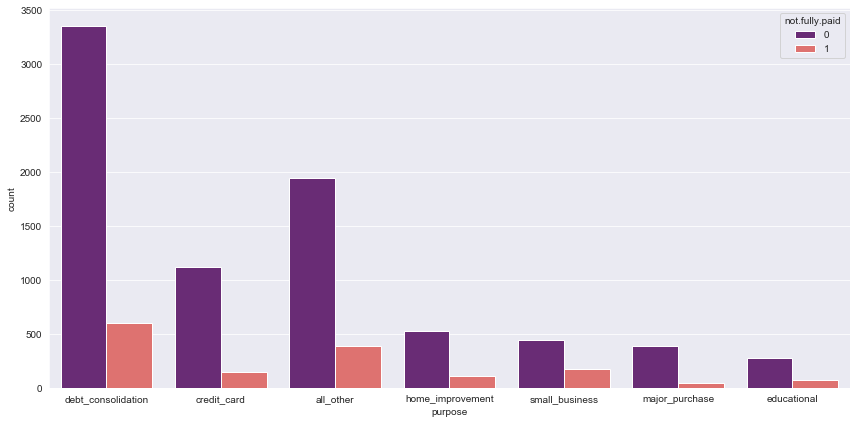

In [8]:
plt.figure(figsize=(12,6))
p = sns.countplot(
    'purpose',
    hue='not.fully.paid',
    data=loans,
    palette='magma'
)
plt.tight_layout()

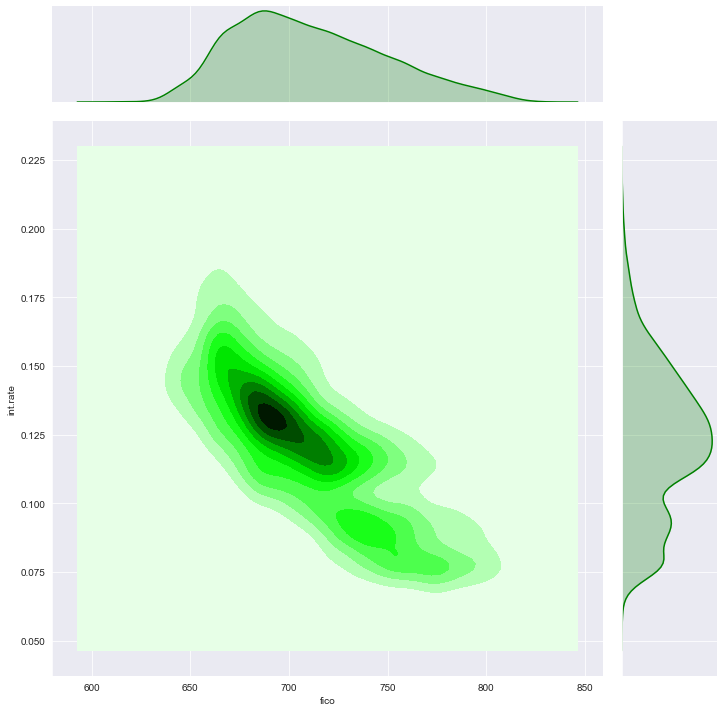

In [9]:
sns.jointplot(
    x='fico',
    y='int.rate',
    data=loans,
    color='green',
    kind='kde',
    height=10
)

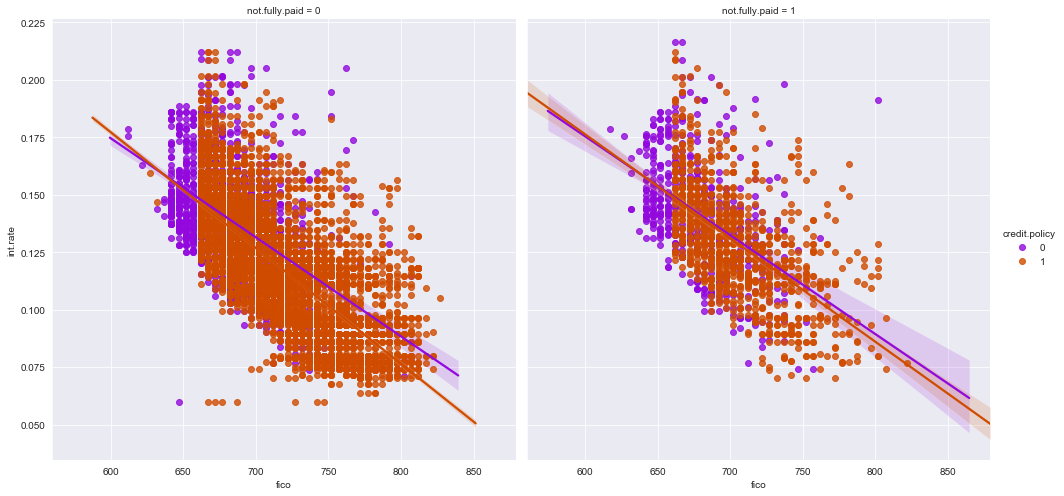

In [10]:
sns.lmplot(
    x='fico', 
    y='int.rate', 
    data=loans, 
    col='not.fully.paid',
    hue='credit.policy',
    palette='gnuplot',
    height=7
)

I don't know a great deal about financial/lending data so it's difficult to pass any meaningful comments. However from looking at the visualisations I can see a few correlations that a machine learning algorithm should be able to leverage.

# Creating Decision Tree Model

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The `purpose` field is categorical. For this to be understood by our model this data needs to be interpreted in figures using `pd.get_dummies()`

In [13]:
purposes = pd.get_dummies(loans['purpose'], drop_first=True)
purposes.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [14]:
final_data = pd.concat(
    [loans.drop('purpose', axis='columns'), purposes], 
    axis='columns'
)

Or even more easily with `pd.get_dummies()`...

In [15]:
final_data = pd.get_dummies(
    loans, 
    columns=['purpose'], 
    drop_first=True
)

## Training Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid', axis='columns')
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [18]:
y = final_data['not.fully.paid']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=100
)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predicting with the Decision Tree Model

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
cr1 = classification_report(y_test, predictions)
print(cr1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2621
           1       0.23      0.24      0.23       540

    accuracy                           0.73      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.74      0.73      0.74      3161



In [26]:
cm1 = confusion_matrix(y_test, predictions)
print(cm1)

[[2189  432]
 [ 411  129]]


In [27]:
as1 = accuracy_score(y_test, predictions)
print(as1)

0.7333122429610882


## Random Forest Model

Will a random forest model yield a better result?

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfor = RandomForestClassifier(n_estimators=100)

In [30]:
rfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting with the Random Forest Model

In [31]:
predictions = rfor.predict(X_test)

In [32]:
cr2 = classification_report(y_test, predictions)
cm2 = confusion_matrix(y_test, predictions)
as2 = accuracy_score(y_test, predictions)

In [38]:
print('Descision Tree:')
print(cr1)
print('\n')
print('Random Forest:')
print(cr2)

Descision Tree:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2621
           1       0.23      0.24      0.23       540

    accuracy                           0.73      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.74      0.73      0.74      3161



Random Forest:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2621
           1       0.43      0.02      0.03       540

    accuracy                           0.83      3161
   macro avg       0.63      0.51      0.47      3161
weighted avg       0.76      0.83      0.76      3161



In [39]:
print('Descision Tree:')
print(cm1)
print('\n')
print('Random Forest:')
print(cm2)

Descision Tree:
[[2189  432]
 [ 411  129]]


Random Forest:
[[2609   12]
 [ 531    9]]


In [40]:
print(f'Decision tree score: {as1}')
print(f'Random forest score: {as2}')

Decision tree score: 0.7333122429610882
Random forest score: 0.8282189180639038


The Random Forest Model works better in this scenario (as predicted earlier) as a lot of the data we are working with here is imbalanced.